# Import Data

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Accidents_Dec20_updated.csv')
df.describe() 

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06   
mean   2.238630e+00  3.690056e+01 -9.859919e+01  3.690061e+01 -9.859901e+01   
std    6.081481e-01  5.165653e+00  1.849602e+01  5.165629e+00  1.849590e+01   
min    1.000000e+00  2.457022e+01 -1.244976e+02  2.457011e+01 -1.244978e+02   
25%    2.000000e+00  3.385422e+01 -1.182076e+02  3.385420e+01 -1.182077e+02   
50%    2.000000e+00  3.735113e+01 -9.438100e+01  3.735134e+01 -9.437987e+01   
75%    2.000000e+00  4.072593e+01 -8.087469e+01  4.072593e+01 -8.087449e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  1.516064e+06  4.699690e+05    1.473031e+06   1.066748e+06   
mean   5.872617e-01  8.907533e+03    5.958460e+01   5.510976e+01   
std    1.632659e+00  2.242190e+04    1.827316e+01   2.112735e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    0.000000e+00  1.212000e+03    4.700000e+01   4.080000e+01   
50%    1.780000e-01  4.000000e+03    6.100000e+01   5.700000e+01   
75%    5.940000e-01  1.010000e+04    7.300000e+01   7.100000e+01   
max    1.551860e+02  9.999997e+06    1.706000e+02   1.130000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  1.470555e+06  1.479790e+06    1.471853e+06     1.387202e+06   
mean   6.465960e+01  2.955495e+01    9.131755e+00     7.630812e+00   
std    2.325986e+01  1.016756e+00    2.889112e+00     5.637364e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.944000e+01    1.000000e+01     4.600000e+00   
50%    6.800000e+01  2.988000e+01    1.000000e+01     7.000000e+00   
75%    8.400000e+01  3.004000e+01    1.000000e+01     1.040000e+01   
max    1.000000e+02  5.804000e+01    1.400000e+02     9.840000e+02   

       Precipitation(in)  
count       1.005515e+06  
mean        8.477855e-03  
std         1.293168e-01  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

# Data Preprocessing

## Select Data in 2019

In [4]:
df['Start_Time']= pd.to_datetime(df['Start_Time'])
df['year'] = df['Start_Time'].dt.year
df = df[df['year'] == 2019]
df = df.drop(columns=['year'])
df

ID  Severity          Start_Time  \
265104   A-2982119         4 2019-10-19 04:30:00   
505581   A-3226009         4 2019-12-17 09:12:52   
596916   A-3318645         4 2019-10-19 04:30:00   
742421   A-3465684         2 2019-10-15 09:55:21   
743275   A-3466538         2 2019-10-11 17:31:42   
...            ...       ...                 ...   
1516059  A-4239402         2 2019-08-23 18:03:25   
1516060  A-4239403         2 2019-08-23 19:11:30   
1516061  A-4239404         2 2019-08-23 19:00:21   
1516062  A-4239405         2 2019-08-23 19:00:21   
1516063  A-4239406         2 2019-08-23 18:52:06   

                              End_Time  Start_Lat   Start_Lng    End_Lat  \
265104   2020-11-01 00:00:00.000000000  38.875540  -77.280396  38.879090   
505581             2020-10-14 07:07:49  33.634089 -112.106196  33.636297   
596916             2020-11-01 00:00:00  38.875540  -77.280396  38.879090   
742421             2020-06-05 10:00:00  45.345250 -118.123440  45.345250   
743275             2020-04-30 01:22:43  40.534050  -80.488090  40.534050   
...                                ...        ...         ...        ...   
1516059            2019-08-23 18:32:01  34.002480 -117.379360  33.998880   
1516060            2019-08-23 19:38:23  32.766960 -117.148060  32.765550   
1516061            2019-08-23 19:28:49  33.775450 -117.847790  33.777400   
1516062            2019-08-23 19:29:42  33.992460 -118.403020  33.983110   
1516063            2019-08-23 19:21:31  34.133930 -117.230920  34.137360   

            End_Lng  Distance(mi)  \
265104   -77.253206         1.483   
505581  -112.104149         0.193   
596916   -77.253206         1.483   
742421  -118.123440         0.000   
743275   -80.488090         0.000   
...             ...           ...   
1516059 -117.370940         0.543   
1516060 -117.153630         0.338   
1516061 -117.857270         0.561   
1516062 -118.395650         0.772   
1516063 -117.239340         0.537   

                                               Description  ...  Roundabout  \
265104   On Rt. 6731 (Vaden Dr) in the County of Fairfa...  ...       False   
505581   Closed road from W Grandview Rd / N Garrin Dr ...  ...       False   
596916   On Rt. 6731 (Vaden Dr) in the County of Fairfa...  ...       False   
742421                       At US-30/Exit 259 - Accident.  ...       False   
743275      At US-30/Lincoln Hwy - Fuel spillage accident.  ...       False   
...                                                    ...  ...         ...   
1516059                           At Market St - Accident.  ...       False   
1516060    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
1516061  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
1516062     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
1516063              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
265104    False  False           False          False        False   
505581    False   True           False          False        False   
596916    False  False           False          False        False   
742421    False  False           False          False        False   
743275    False  False           False          False        False   
...         ...    ...             ...            ...          ...   
1516059   False  False           False          False        False   
1516060   False  False           False          False        False   
1516061   False  False           False          False        False   
1516062   False  False           False          False        False   
1516063   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
265104           Night          Night             Night                 Night  
505581             Day            Day               Day                   Day  
596

## Add New Variables

### Duration - total_hour_duration

In [5]:
# fix datetime type
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

In [6]:
# Calculate the duration of each accident
import datetime
from datetime import timedelta
df['Duration']= df['End_Time'] - df['Start_Time'] 
df['days'] = df['Duration'].dt.days
hours, remainder = divmod(df['Duration'].dt.seconds, 3600)
df['hours'] = hours
minutes, seconds = divmod(remainder, 60)
df['minutes'] = minutes
df['seconds'] = seconds
df['total_hour_duration'] = round(((df['days']*24 + df['hours'])*60 + df['minutes'])/60,0)
df = df.drop(columns=['days', 'hours', 'minutes', 'seconds'])
# remove rows with more than 10 days of duration
df = df.loc[(df['total_hour_duration'] <= 240)]
df

ID  Severity          Start_Time            End_Time  \
1019560  A-3742898         3 2019-12-31 23:58:17 2020-01-01 00:27:03   
1019561  A-3742899         3 2019-12-31 23:58:17 2020-01-01 00:27:03   
1019562  A-3742900         3 2019-12-31 23:58:17 2020-01-01 00:27:03   
1019563  A-3742901         3 2019-12-31 23:58:17 2020-01-01 00:27:03   
1019565  A-3742903         2 2019-12-31 23:18:00 2020-01-01 02:31:54   
...            ...       ...                 ...                 ...   
1516059  A-4239402         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
1516060  A-4239403         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
1516061  A-4239404         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
1516062  A-4239405         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
1516063  A-4239406         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
1019560   41.87248  -87.64574  41.87036  -87.64508         0.150   
1019561   41.87561  -87.64155  41.87571  -87.64355         0.103   
1019562   41.90150  -87.92034  41.90963  -87.93019         0.756   
1019563   41.87410  -87.64598  41.87248  -87.64574         0.113   
1019565   44.94843  -92.90329  44.94843  -92.90329         0.000   
...            ...        ...       ...        ...           ...   
1516059   34.00248 -117.37936  33.99888 -117.37094         0.543   
1516060   32.76696 -117.14806  32.76555 -117.15363         0.338   
1516061   33.77545 -117.84779  33.77740 -117.85727         0.561   
1516062   33.99246 -118.40302  33.98311 -118.39565         0.772   
1516063   34.13393 -117.23092  34.13736 -117.23934         0.537   

                                               Description  ...   Stop  \
1019560  Ramp to I-290/Eisenhower Exy/Exit 51H/51I - Ac...  ...  False   
1019561                 Ramp to I-90 Westbound - Accident.  ...  False   
1019562     At US-20/Lake St/North Ave/Exit 13 - Accident.  ...  False   
1019563  Ramp to I-90/I-94 Eastbound and W Taylor St - ...  ...  False   
1019565  At CR-19/Woodbury Dr/Exit 251 - Vehicle spun a...  ...  False   
...                                                    ...  ...    ...   
1516059                           At Market St - Accident.  ...  False   
1516060    At Camino Del Rio/Mission Center Rd - Accident.  ...  False   
1516061  At Glassell St/Grand Ave - Accident. in the ri...  ...  False   
1516062     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...  False   
1516063              At Highland Ave/Arden Ave - Accident.  ...  False   

        Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
1019560           False          False        False          Night   
1019561           False          False        False          Night   
1019562           False          False        False          Night   
1019563           False          False        False          Night   
1019565           False          False        False          Night   
...                 ...            ...          ...            ...   
1516059           False          False        False            Day   
1516060           False          False        False            Day   
1516061           False          False        False            Day   
1516062           False          False        False            Day   
1516063           False          False        False            Day   

        Civil_Twilight Nautical_Twilight Astronomical_Twilight  \
1019560          Night             Night                 Night   
1019561          Night             Night                 Night   
1019562          Night             Night                 Night   
1019563          Night             Night                 Night   
1019565          Night             Night                 Night   
...                ...               ...                   ...   
1516059            Day               Day                   Day   
1516060            Day               Day                   Day   
1516061   

### UrbanRural (According to the zipcode)

In [7]:
# fix zipcode
def fix_zip(input_zip):
    try:
        input_zip = int(float(input_zip))
    except:
        try:
            input_zip = int(input_zip.split('-')[0])
        except:
            return np.NaN
    return str(input_zip)
df['Zipcode'] = df['Zipcode'].apply(fix_zip)
df['Zipcode'].unique()

array(['60607', '60126', '55129', ..., '68008', '36541', '71303'],
      dtype=object)

In [8]:
# import ruralurban index and add a column to show whether it is a rural or urban area
ruralurban_index = pd.read_csv('Book3.csv')
row_drop = ruralurban_index[ruralurban_index.isna().sum(axis=1)>=5].index
ruralurban_index.drop(row_drop,axis=0,inplace=True)

In [9]:
ruralurban_index

ZIP  STCOUNTYFP CLASSFP         COUNTYNAME STATE urbanrural  \
0      36003        1001      H1     Autauga County    AL      urban   
1      36006        1001      H1     Autauga County    AL      urban   
2      36067        1001      H1     Autauga County    AL      urban   
3      36066        1001      H1     Autauga County    AL      urban   
4      36703        1001      H1     Autauga County    AL      urban   
...      ...         ...     ...                ...   ...        ...   
52884    850       78010      H4   St. Croix Island    VI      rural   
52885    840       78010      H4   St. Croix Island    VI      rural   
52886    820       78010      H4   St. Croix Island    VI      rural   
52887    830       78020      H4    St. John Island    VI      rural   
52888    802       78030      H4  St. Thomas Island    VI      rural   

       Unnamed: 6  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
52884         NaN  
52885         NaN  
52886         NaN  
52887         NaN  
52888         NaN  

[52889 rows x 7 columns]

In [10]:
# fix zipcode in rural urban index
def zip_floattostring(input_zip):
    input_zip = str(int(float(input_zip)))
    if len(input_zip)==4:
        input_zip = '0'+input_zip  
    if len(input_zip)==3:
        input_zip = '00'+input_zip
    return str(input_zip)
ruralurban_index['ZIP'] = ruralurban_index['ZIP'].apply(zip_floattostring)
ruralurban_index['ZIP'].unique()
ruralurban_index = ruralurban_index[["ZIP","urbanrural"]]
ruralurban_index.columns = ['Zipcode','UrbanRural']
ruralurban_index
ruralurban_index_new = ruralurban_index.drop_duplicates(subset=['Zipcode']) 

In [11]:
# Do vlookup to add a ruralurban column in df
df = pd.merge(left=df, right=ruralurban_index_new, how='left', on='Zipcode')


In [12]:
# About 8827 rows cannot find whether it is a rural or urban area
print(sum(df['UrbanRural'].isna()))
print(len(df['UrbanRural']))

8827
261692


### Population of 2019

In [13]:
#read county info dataset with population from 2019
county_info_df = pd.read_excel('US_population_16-20_county.xlsx')
county_info_df = county_info_df[['County','State',2019]]
col_names = ['County','State','Population']
county_info_df.columns = col_names
county_info_df

County State  Population
0        Autauga    AL       55769
1        Baldwin    AL      223565
2        Barbour    AL       24657
3           Bibb    AL       22313
4         Blount    AL       57840
...          ...   ...         ...
3138  Sweetwater    WY       42917
3139       Teton    WY       23385
3140       Uinta    WY       20196
3141    Washakie    WY        7824
3142      Weston    WY        6880

[3143 rows x 3 columns]

In [14]:
df = pd.merge(df, county_info_df, on=['County','State'], how = 'left' )

## Handling Missing Data & Useless Features

In [15]:
# missing values
missing_values = df.isna().sum()
percentage = (missing_values/df.shape[0])*100
missing_percentage = pd.DataFrame({"Number_of_missing_values":missing_values,"Percentage":percentage})
missing_percentage.sort_values(by="Percentage",ascending = False)

Number_of_missing_values  Percentage
Number                                   194907   74.479541
Precipitation(in)                         54957   21.000642
Wind_Chill(F)                             33474   12.791373
Wind_Speed(mph)                           17295    6.608914
UrbanRural                                 8827    3.373049
Wind_Direction                             7921    3.026841
Humidity(%)                                7534    2.878957
Weather_Condition                          7267    2.776929
Temperature(F)                             7254    2.771961
Visibility(mi)                             7187    2.746358
Pressure(in)                               5799    2.215964
Weather_Timestamp                          5039    1.925546
Population                                 4774    1.824282
Airport_Code                                942    0.359965
Timezone                                    769    0.293857
Zipcode                                     243    0.092857
City                                          5    0.001911
Astronomical_Twilight                         5    0.001911
Sunrise_Sunset                                5    0.001911
Nautical_Twilight                             5    0.001911
Civil_Twilight                                5    0.001911
Duration                                      0    0.000000
total_hour_duration                           0    0.000000
Junction                                      0    0.000000
Start_Time                                    0    0.000000
Turning_Loop                                  0    0.000000
Traffic_Signal                                0    0.000000
Traffic_Calming                               0    0.000000
Stop                                          0    0.000000
Station                                       0    0.000000
Roundabout                                    0    0.000000
Railway                                       0    0.000000
No_Exit                                       0    0.000000
Crossing                                      0    0.000000
Give_Way                                      0    0.000000
End_Lng                                       0    0.000000
State                                         0    0.000000
Country                                       0    0.000000
Side                                          0    0.000000
Street                                        0    0.000000
Description                                   0    0.000000
Distance(mi)                                  0    0.000000
Severity                                      0    0.000000
County                                        0    0.000000
End_Lat                                       0    0.000000
Start_Lng                                     0    0.000000
Start_Lat                                     0    0.000000
End_Time                                      0    0.000000
Amenity                                       0    0.000000
Bump                                          0    0.000000
ID                                            0    0.000000

In [16]:
#Drop columns consists more than 40% missing values
df.drop(["Number"],axis=1,inplace=True)
# Drop features which do not provide much useful information or provide redundant information or not worth manipulation
df.drop(["ID", "Description", "End_Lat", "End_Lng", "Country", "City", "Street", "Zipcode", "Airport_Code", "Side", "Timezone", "Wind_Direction", "Weather_Condition", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight", "Duration"],axis=1,inplace=True)
# dropping rows consisting missing values 
row_drop = df[df.isna().sum(axis=1)>=1].index
df.drop(row_drop,axis=0,inplace=True)

#### Since the 'Weather_Timestamp' is almost as same as 'Start_Time', we can just keep 'Start_Time'

In [17]:
# average difference between weather time and start time
print("Mean difference between 'Start_Time' and 'Weather_Timestamp': ", 
(df.Weather_Timestamp - df.Start_Time).mean())

Mean difference between 'Start_Time' and 'Weather_Timestamp':  0 days 00:00:31.703686684


In [18]:
df = df.drop(["Weather_Timestamp"], axis=1)

#### Delete invariant columns

In [19]:
df['Turning_Loop'].unique()

array([False])

In [20]:
df['Roundabout'].unique()

array([False])

In [21]:
df = df.drop(["Turning_Loop", 'Roundabout'], axis=1)

#### Double check missing values

In [22]:
# missing values
missing_values = df.isna().sum()
percentage = (missing_values/df.shape[0])*100
missing_percentage = pd.DataFrame({"Number_of_missing_values":missing_values,"Percentage":percentage})
missing_percentage.sort_values(by="Percentage",ascending = False)

Number_of_missing_values  Percentage
Severity                                    0         0.0
Start_Time                                  0         0.0
UrbanRural                                  0         0.0
total_hour_duration                         0         0.0
Sunrise_Sunset                              0         0.0
Traffic_Signal                              0         0.0
Traffic_Calming                             0         0.0
Stop                                        0         0.0
Station                                     0         0.0
Railway                                     0         0.0
No_Exit                                     0         0.0
Junction                                    0         0.0
Give_Way                                    0         0.0
Crossing                                    0         0.0
Bump                                        0         0.0
Amenity                                     0         0.0
Precipitation(in)                           0         0.0
Wind_Speed(mph)                             0         0.0
Visibility(mi)                              0         0.0
Pressure(in)                                0         0.0
Humidity(%)                                 0         0.0
Wind_Chill(F)                               0         0.0
Temperature(F)                              0         0.0
State                                       0         0.0
County                                      0         0.0
Distance(mi)                                0         0.0
Start_Lng                                   0         0.0
Start_Lat                                   0         0.0
End_Time                                    0         0.0
Population                                  0         0.0

## Generate Dummy Variables

In [23]:
from sklearn.preprocessing import LabelEncoder
list_facility = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'UrbanRural']
for item in list_facility:
    encoder = LabelEncoder()
    encoder.fit(df[f'{item}'])
    df[f'{item}'] = encoder.transform(df[f'{item}'])


## Correlation

In [24]:
# Scale weather attributes
from sklearn.preprocessing import scale  # Data scaling
df[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']] = scale(df[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']])
df.corr()

Severity  Start_Lat  Start_Lng  Distance(mi)  \
Severity             1.000000  -0.033371   0.426091      0.241844   
Start_Lat           -0.033371   1.000000  -0.071273      0.051039   
Start_Lng            0.426091  -0.071273   1.000000      0.150331   
Distance(mi)         0.241844   0.051039   0.150331      1.000000   
Temperature(F)       0.028800  -0.457077  -0.034343     -0.016825   
Wind_Chill(F)        0.021133  -0.461070  -0.060180     -0.022614   
Humidity(%)          0.090169   0.146856   0.189081      0.050036   
Pressure(in)        -0.069413  -0.184424   0.000081     -0.078198   
Visibility(mi)       0.035485  -0.079047  -0.025407     -0.010448   
Wind_Speed(mph)      0.058374   0.103275   0.146830      0.048378   
Precipitation(in)   -0.001499  -0.000019   0.030379      0.007692   
Amenity              0.017029   0.027087  -0.010435     -0.013839   
Bump                -0.002742   0.002623  -0.007450     -0.002361   
Crossing             0.025471   0.026575  -0.009320     -0.033207   
Give_Way             0.024715   0.002314   0.018614     -0.000896   
Junction             0.019469  -0.076061   0.070427      0.007676   
No_Exit              0.013390  -0.007879   0.010654     -0.003509   
Railway              0.001547   0.009463  -0.021280     -0.013029   
Station             -0.002687  -0.006703  -0.019891     -0.026709   
Stop                 0.004147   0.015752  -0.038174     -0.000106   
Traffic_Calming      0.002864   0.002272   0.003685     -0.001679   
Traffic_Signal       0.031747  -0.045522   0.036389     -0.053501   
Sunrise_Sunset       0.022849   0.010041  -0.052120     -0.011986   
total_hour_duration -0.097232   0.167145  -0.176022      0.011911   
UrbanRural          -0.010071  -0.320437   0.062546     -0.128484   
Population          -0.124726  -0.459067  -0.211675     -0.112491   

                     Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
Severity                   0.028800       0.021133     0.090169     -0.069413   
Start_Lat                 -0.457077      -0.461070     0.146856     -0.184424   
Start_Lng                 -0.034343      -0.060180     0.189081      0.000081   
Distance(mi)              -0.016825      -0.022614     0.050036     -0.078198   
Temperature(F)             1.000000       0.994040    -0.542145      0.112262   
Wind_Chill(F)              0.994040       1.000000    -0.524054      0.116505   
Humidity(%)               -0.542145      -0.524054     1.000000      0.169809   
Pressure(in)               0.112262       0.116505     0.169809      1.000000   
Visibility(mi)             0.291208       0.298471    -0.364301     -0.104454   
Wind_Speed(mph)            0.046917      -0.003187    -0.133889     -0.077375   
Precipitation(in)         -0.076220      -0.075623     0.176211      0.015118   
Amenity                    0.003218       0.004006    -0.001026      0.016432   
Bump                       0.000012       0.000131     0.000609      0.004603   
Crossing                   0.010186       0.011068    -0.013667      0.008326   
Give_Way                  -0.000704      -0.000780     0.004458     -0.001229   
Junction                   0.052025       0.052143     0.014472      0.090088   
No_Exit                    0.008105       0.007775    -0.003997      0.001230   
Railway                    0.000767       0.002349     0.003525      0.029648   
Station                    0.014978       0.015884    -0.006958      0.049529   
Stop                      -0.000856       0.000773    -0.010878      0.010227   
Traffic_Calming            0.000936       0.001147     0.003461      0.006433   
Traffic_Signal             0.034276       0.033997    -0.026427      0.029282   
Sunrise_Sunset            -0.319952      -0.302902     0.263948      0.015003   
total_hour_duration       -0.076950      -0.073612     0.020638     -0.037703   
UrbanRural                 0.189663       0.192360    -0.083892      0.202583   
Population                 0.208428       0.213206 

Text(0.5, 1.0, 'Correlation')

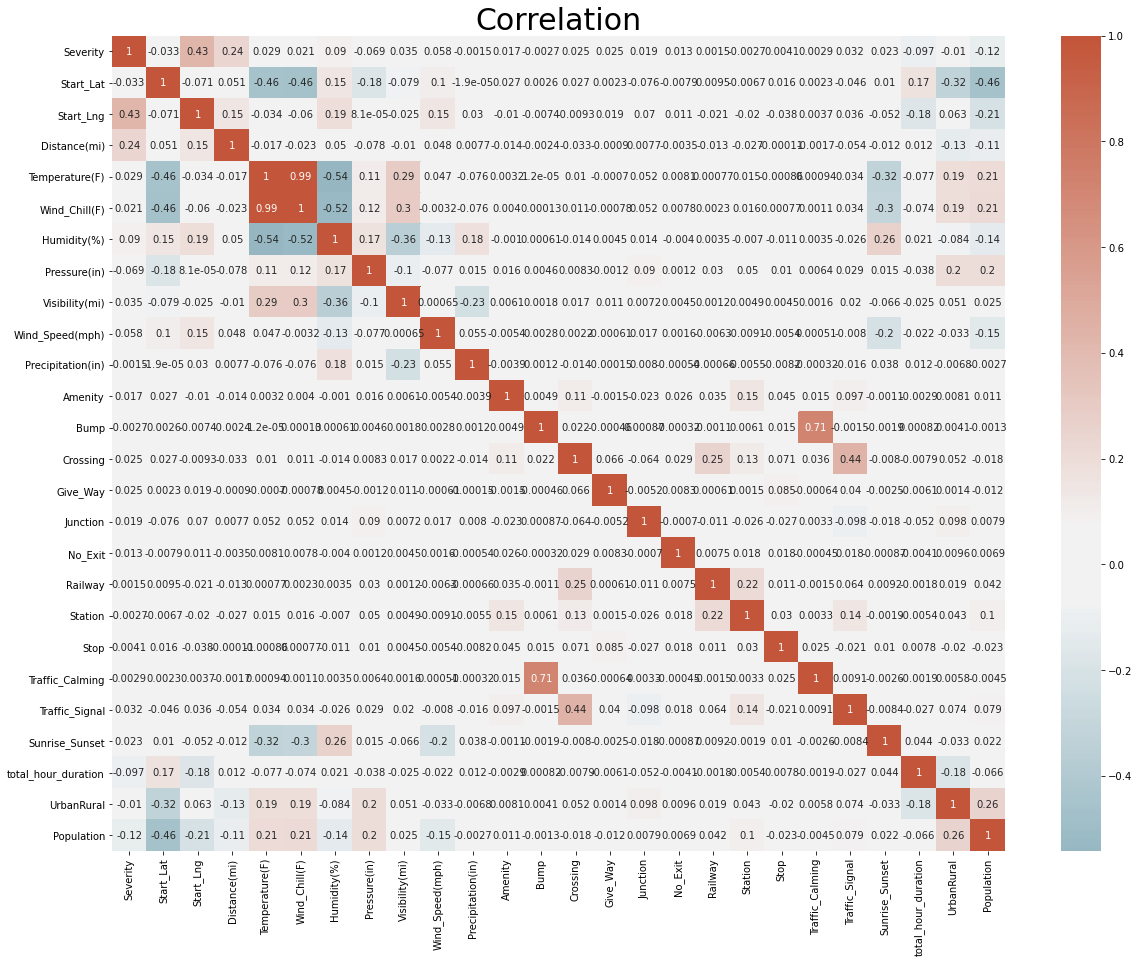

In [25]:
fig, ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap, center=0).set_title("Correlation", fontsize=30)

## PCA (Weather Attributes)

In [26]:
from sklearn import decomposition #PCA
import pandas as pd # pandas

In [27]:
x_weather = df[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']]

In [28]:
# !pip install factor_analyzer

In [29]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value_weather,p_value_weather=calculate_bartlett_sphericity(x_weather)
print(chi_square_value_weather, p_value_weather)

1022162.1871326579 0.0


In [30]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all_weather,kmo_model_weather=calculate_kmo(x_weather)
kmo_model_weather

0.5549643904038885

In [31]:
pca_weather = decomposition.PCA(n_components=5)
pca_weather.fit(x_weather)

PCA(n_components=5)

In [32]:
scores_weather = pca_weather.transform(x_weather)
scores_df_weather = pd.DataFrame(scores_weather, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
scores_df_weather

PC1       PC2       PC3       PC4       PC5
0      -2.592237 -1.045568 -0.439694 -0.602476  0.856119
1      -2.592237 -1.045568 -0.439694 -0.602476  0.856119
2      -2.816937 -1.106166 -0.467363 -0.606078  0.898145
3      -2.592237 -1.045568 -0.439694 -0.602476  0.856119
4      -3.508470 -1.048720 -1.579619  0.358630  0.899669
...          ...       ...       ...       ...       ...
189325  1.989361 -0.045821  0.938890 -0.518533 -0.216154
189326  0.340036  0.380423 -0.337859 -0.053364  0.190730
189327  0.729256  0.363084  0.197791 -0.618805  0.223160
189328  0.265577  0.515579 -0.145298 -0.388158  0.294836
189329  1.046664  0.328762  0.369290  0.234768 -1.046651

[189330 rows x 5 columns]

In [33]:
weather_names = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

loadings_weather = pca_weather.components_.T
df_loadings_weather = pd.DataFrame(loadings_weather, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=weather_names)
print(df_loadings_weather)

                        PC1       PC2       PC3       PC4       PC5
Temperature(F)     0.570710  0.259576  0.092014  0.059836 -0.135572
Wind_Chill(F)      0.567453  0.273119  0.055573  0.093785 -0.126311
Humidity(%)       -0.466859  0.256708 -0.122428 -0.054101  0.136240
Pressure(in)       0.006321  0.686664 -0.224671 -0.534329  0.292452
Visibility(mi)     0.331443 -0.371218 -0.254681  0.002418  0.818810
Wind_Speed(mph)    0.048573 -0.233046  0.703496 -0.647584  0.071810
Precipitation(in) -0.148577  0.358478  0.602670  0.528978  0.431242


In [34]:
df_loadings_weather['PC1'] = np.where((df_loadings_weather['PC1']<=0.4) & (df_loadings_weather['PC1']>=-0.4),0,df_loadings_weather['PC1'])
df_loadings_weather['PC2'] = np.where((df_loadings_weather['PC2']<=0.4) & (df_loadings_weather['PC2']>=-0.4),0,df_loadings_weather['PC2'])
df_loadings_weather['PC3'] = np.where((df_loadings_weather['PC3']<=0.4) & (df_loadings_weather['PC3']>=-0.4),0,df_loadings_weather['PC3'])
df_loadings_weather['PC4'] = np.where((df_loadings_weather['PC4']<=0.4) & (df_loadings_weather['PC4']>=-0.4),0,df_loadings_weather['PC4'])
df_loadings_weather['PC5'] = np.where((df_loadings_weather['PC5']<=0.4) & (df_loadings_weather['PC5']>=-0.4),0,df_loadings_weather['PC5'])
print(df_loadings_weather)


                        PC1       PC2       PC3       PC4       PC5
Temperature(F)     0.570710  0.000000  0.000000  0.000000  0.000000
Wind_Chill(F)      0.567453  0.000000  0.000000  0.000000  0.000000
Humidity(%)       -0.466859  0.000000  0.000000  0.000000  0.000000
Pressure(in)       0.000000  0.686664  0.000000 -0.534329  0.000000
Visibility(mi)     0.000000  0.000000  0.000000  0.000000  0.818810
Wind_Speed(mph)    0.000000  0.000000  0.703496 -0.647584  0.000000
Precipitation(in)  0.000000  0.000000  0.602670  0.528978  0.431242


In [35]:
explained_variance_weather = pca_weather.explained_variance_ratio_
print(explained_variance_weather)

[0.3751512  0.17755452 0.15729356 0.12512914 0.0982268 ]


### Scree Plot

In [36]:
# pip install plotly

In [37]:
import numpy as np
import plotly.express as px

In [38]:
explained_variance_weather = np.insert(explained_variance_weather, 0, 0)

In [39]:
cumulative_variance_weather = np.cumsum(np.round(explained_variance_weather, decimals=3))

In [40]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3', 'PC4', 'PC5'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance_weather, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance_weather, columns=['Cumulative Variance'])

In [41]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

PC  Explained Variance  Cumulative Variance
0                 0.000000                0.000
1  PC1            0.375151                0.375
2  PC2            0.177555                0.553
3  PC3            0.157294                0.710
4  PC4            0.125129                0.835
5  PC5            0.098227                0.933

#### Explained Variance

In [42]:

fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

#### Explained Variance + Cumulative Variance

In [43]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

## Construct components

### PCA Implication

In [44]:
df['Temperature_Wind_Chill_Humidity'] = 0.570710*df['Temperature(F)'] + 0.567453*df['Wind_Chill(F)'] + (-0.466859)*df['Humidity(%)']
df = df.drop(['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)'], axis=1)

### Correlation Table Implication

In [45]:
df['Bump_Calming'] = np.where((df['Bump']==0) & (df['Traffic_Calming']==0),0,1)
df = df.drop(['Bump', 'Traffic_Calming'], axis=1)
df['Signal_Crossing'] = np.where((df['Traffic_Signal']==0) & (df['Crossing']==0),0,1)
df = df.drop(['Traffic_Signal', 'Crossing'], axis=1)

Text(0.5, 1.0, 'Correlation')

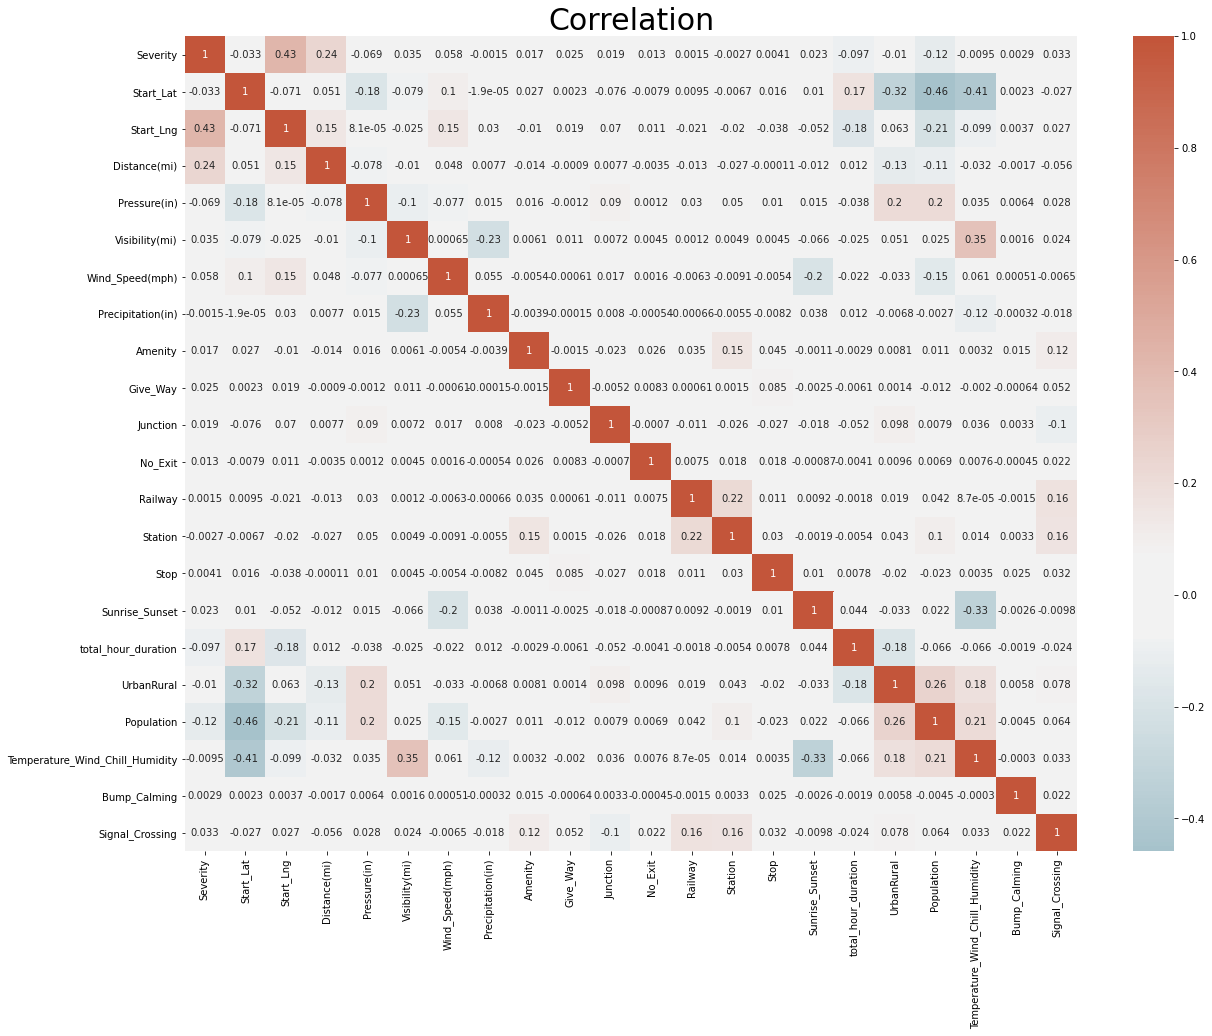

In [46]:
fig, ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap, center=0).set_title("Correlation", fontsize=30)

# Data Visualization - National in 2019

In [47]:
# Counties in different states may also have the same county name. We need to identify areas by both county and state
df["County_State"]=df["County"]+"_"+df["State"]

In [48]:
# see the number of accident by State level 
# -> California has the largest number of accident record
state = df.groupby('State').size()
state.sort_values(ascending = False)

State
CA    87400
OR    26031
UT    10844
MN     9915
FL     7044
NY     5174
IL     4907
TX     4597
CO     4427
MI     4069
GA     3493
WA     3462
NC     1810
AZ     1636
VA     1563
MD     1517
TN     1271
IN     1114
PA     1080
WI      997
SC      862
AL      787
MO      740
AR      613
OH      574
KY      452
IA      415
ID      406
KS      375
NE      331
MS      328
WV      304
NV      206
DE      169
NM      149
OK      100
MT       96
WY       47
SD       18
ND        7
dtype: int64

In [49]:
# see the number of accident by County level 
county = df.groupby(['State','County']).size()
county.sort_values(ascending = False).head(10) #top 10 accidents area

State  County        
CA     Los Angeles       25689
       Orange             6903
       San Bernardino     6102
       San Diego          5744
UT     Salt Lake          5404
CA     Riverside          5214
       Alameda            5167
OR     Multnomah          3731
CA     Santa Clara        2769
IL     Cook               2720
dtype: int64

In [50]:
# see the number of accident by rural/urban level 
# The number of accident in urban area is more than 10 times that in rural areas
UrbanRural = df.groupby('UrbanRural').size()
UrbanRural

UrbanRural
0     21748
1    167582
dtype: int64

<AxesSubplot:xlabel='UrbanRural'>

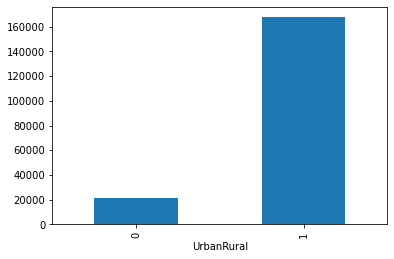

In [51]:
UrbanRural.plot(kind='bar')

In [52]:
county_df =county.to_frame()
county_df = county_df.reset_index()
col_names = ['State', 'County', 'Number of Accidents']
county_df.columns = col_names
county_df.sort_values("Number of Accidents",inplace=True, ascending=False)
county_df

State          County  Number of Accidents
140     CA     Los Angeles                25689
151     CA          Orange                 6903
157     CA  San Bernardino                 6102
158     CA       San Diego                 5744
1483    UT       Salt Lake                 5404
...    ...             ...                  ...
1519    VA       Dickenson                    1
831     MO         Clinton                    1
410     IA         Audubon                    1
832     MO            Cole                    1
1545    VA       Lunenburg                    1

[1707 rows x 3 columns]

array([[<AxesSubplot:title={'center':'Number of Accidents'}>]],
      dtype=object)

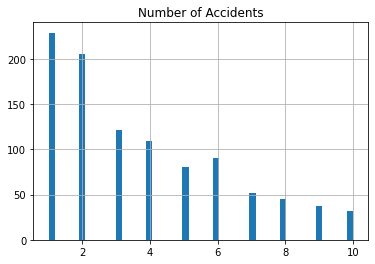

In [53]:
# 975 out of 1710(57%) counties have less than 10 accidents in 2019 
# 700 out of 1710(40%) counties have 10-1000 accidents in 2019 

len(county_df[county_df['Number of Accidents']<10]) 
county_df[(county_df['Number of Accidents']>= 1) & (county_df['Number of Accidents']<= 10)].hist(bins=50)


array([[<AxesSubplot:title={'center':'Number of Accidents'}>]],
      dtype=object)

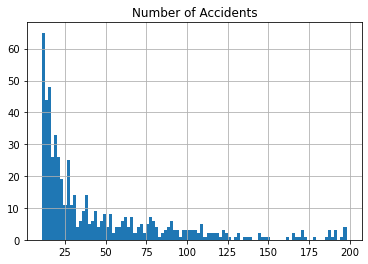

In [54]:
county_df[(county_df['Number of Accidents']>10) & (county_df['Number of Accidents']<= 200)].hist(bins=100)

In [55]:
# will use Plotly to do the county visualization on Pycharm 

In [56]:
# read each county's FIPS colde for preparation of the statewide plot
fips_df = pd.read_excel('US_population_16-20_county.xlsx')
fips_df = fips_df[['STATE','COUNTY','County','State']]
county_plot_df = pd.merge(county_df,fips_df, on = ['County','State'], how = 'left')
col_names = ['State', 'County', 'Number of Accidents', 'State FIPS', 'County FIPS']
county_plot_df.columns = col_names
county_plot_df

State          County  Number of Accidents  State FIPS  County FIPS
0       CA     Los Angeles                25689           6           37
1       CA          Orange                 6903           6           59
2       CA  San Bernardino                 6102           6           71
3       CA       San Diego                 5744           6           73
4       UT       Salt Lake                 5404          49           35
...    ...             ...                  ...         ...          ...
1702    VA       Dickenson                    1          51           51
1703    MO         Clinton                    1          29           49
1704    IA         Audubon                    1          19            9
1705    MO            Cole                    1          29           51
1706    VA       Lunenburg                    1          51          111

[1707 rows x 5 columns]

In [57]:
# construct full FIPS
county_plot_df['State FIPS'] = county_plot_df['State FIPS'].apply(lambda x: str(x).zfill(2))
county_plot_df['County FIPS'] = county_plot_df['County FIPS'].apply(lambda x: str(x).zfill(3))
county_plot_df['FIPS'] =  county_plot_df['State FIPS'] + county_plot_df['County FIPS']
county_plot_df

State          County  Number of Accidents State FIPS County FIPS   FIPS
0       CA     Los Angeles                25689         06         037  06037
1       CA          Orange                 6903         06         059  06059
2       CA  San Bernardino                 6102         06         071  06071
3       CA       San Diego                 5744         06         073  06073
4       UT       Salt Lake                 5404         49         035  49035
...    ...             ...                  ...        ...         ...    ...
1702    VA       Dickenson                    1         51         051  51051
1703    MO         Clinton                    1         29         049  29049
1704    IA         Audubon                    1         19         009  19009
1705    MO            Cole                    1         29         051  29051
1706    VA       Lunenburg                    1         51         111  51111

[1707 rows x 6 columns]

In [58]:
#Normalization
# (Total accident per county/county population in 2019) x 10,000
pop_df = df[['State', 'County','Population']]
county_plot_df = pd.merge(county_plot_df,pop_df, on = ['County','State'], how = 'left')
county_plot_df = county_plot_df.drop_duplicates()
county_plot_df['Accident Rate'] = county_plot_df['Number of Accidents'] / county_plot_df['Population']* 10000
county_plot_df

State          County  Number of Accidents State FIPS County FIPS  \
0         CA     Los Angeles                25689         06         037   
25689     CA          Orange                 6903         06         059   
32592     CA  San Bernardino                 6102         06         071   
38694     CA       San Diego                 5744         06         073   
44438     UT       Salt Lake                 5404         49         035   
...      ...             ...                  ...        ...         ...   
189325    VA       Dickenson                    1         51         051   
189326    MO         Clinton                    1         29         049   
189327    IA         Audubon                    1         19         009   
189328    MO            Cole                    1         29         051   
189329    VA       Lunenburg                    1         51         111   

         FIPS  Population  Accident Rate  
0       06037  10011602.0      25.659230  
25689   06059   3170851.0      21.770181  
32592   06071   2177279.0      28.025807  
38694   06073   3330459.0      17.246872  
44438   49035   1158585.0      46.643103  
...       ...         ...            ...  
189325  51051     14295.0       0.699545  
189326  29049     20434.0       0.489380  
189327  19009      5491.0       1.821162  
189328  29051     76774.0       0.130252  
189329  51111     12251.0       0.816260  

[1707 rows x 8 columns]

In [59]:
# county_plot_df.to_csv('2019_accident_rate.csv')

In [60]:
#can see the max/min accident rate 
#max 1000 min 0.02
county_plot_df.sort_values(by = 'Accident Rate', ascending = False)

State     County  Number of Accidents State FIPS County FIPS   FIPS  \
161954    OR    Sherman                  179         41         055  41055   
161205    OR    Gilliam                  188         41         021  41021   
169655    OR    Wheeler                   94         41         069  41069   
155405    OR      Grant                  248         41         023  41023   
179379    CA     Alpine                   35         06         003  06003   
...      ...        ...                  ...        ...         ...    ...   
189201    TX    Midland                    1         48         329  48329   
189205    SD  Minnehaha                    1         46         099  46099   
187717    VA    Fairfax                    5         51         059  51059   
189181    NE  Lancaster                    1         31         109  31109   
187537    NV      Clark                    5         32         003  32003   

        Population  Accident Rate  
161954      1790.0    1000.000000  
161205      1911.0     983.778127  
169655      1348.0     697.329377  
155405      7166.0     346.078705  
179379      1113.0     314.465409  
...            ...            ...  
189201    176444.0       0.056675  
189205    194153.0       0.051506  
187717   1152359.0       0.043389  
189181    318403.0       0.031407  
187537   2275884.0       0.021969  

[1707 rows x 8 columns]

In [61]:
county_plot_df['Accident Rate'].mean()

9.087185172545318

In [62]:
# import plotly.figure_factory as ff

# import numpy as np
# import pandas as pd
# import ssl

# ssl._create_default_https_context = ssl._create_unverified_context
# df_sample = pd.read_csv('/Users/amandali/Desktop/Data_Analytics/group_project/2020_accident_rate.csv')

# colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
#               "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
#               "#08519c","#0b4083","#08306b"]
# endpts = list(np.linspace(0.5, 50, len(colorscale) - 1))
# fips = df_sample['FIPS'].tolist()
# values = df_sample['Accident Rate'].tolist()

# fig = ff.create_choropleth(
#     fips=fips, values=values,
#     binning_endpoints=endpts,
#     colorscale=colorscale,
#     show_state_data=False,
#     show_hover=True, centroid_marker={'opacity': 0},
#     asp=2.9, title='USA by accident rate %',
#     legend_title='% accident'
# )

# fig.layout.template = None
# fig.show()

In [63]:
#the plot describing the national accident rate after normalization
#use scale 1- 100

In [64]:
from IPython.display import Image
Image(url= "2019_1_100.png", width=1000, height=1000)


In [65]:
#if use scale 0.5-50

In [66]:
from IPython.display import Image
Image(url= "2019_0.5_50.png", width=1000, height=1000)

# Data Visualization -- Severity analysis

/opt/anaconda3/envs/env2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



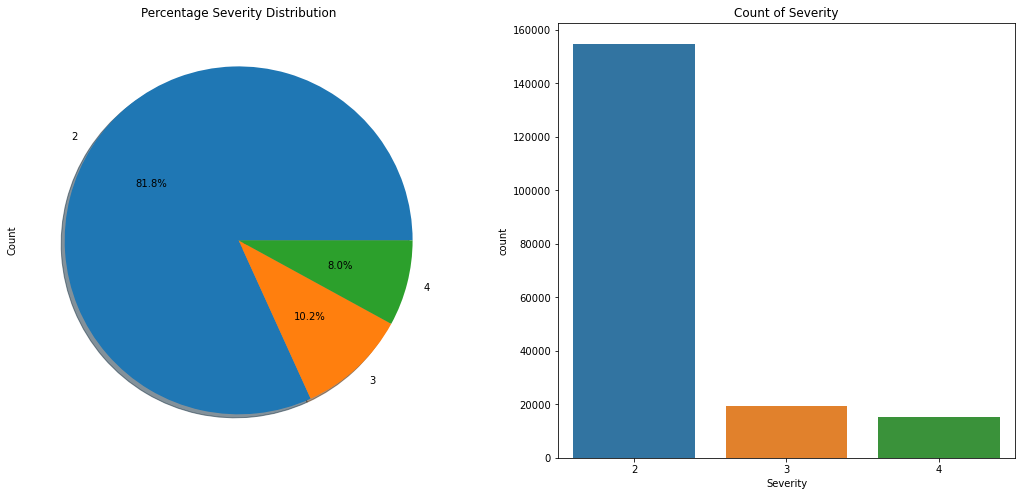

In [67]:
# Count accidents of each severity. The result shows that 80% of accidents are of severity 2.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Severity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

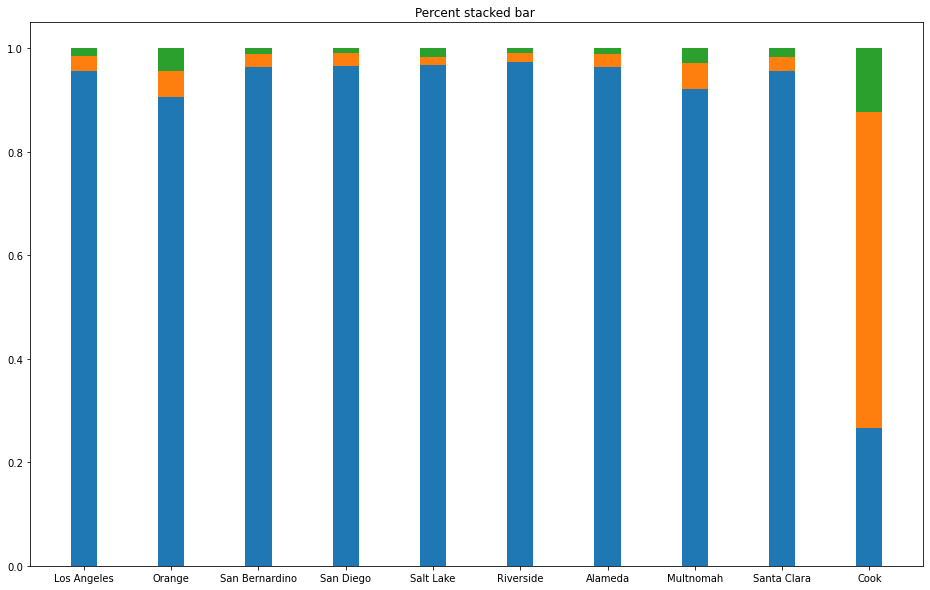

In [68]:
Head_county = list(county_df.head(10)['County'])
Head_county_df = df.loc[df['County'].isin(Head_county)]

Severity_2 = Head_county_df[Head_county_df['Severity']==2].groupby('County')
Severity_2 = [Severity_2.size()['Los Angeles'],Severity_2.size()['Orange'],Severity_2.size()['San Bernardino'],Severity_2.size()['San Diego'],Severity_2.size()['Salt Lake'],Severity_2.size()['Riverside'],Severity_2.size()['Alameda'],Severity_2.size()['Multnomah'],Severity_2.size()['Santa Clara'],Severity_2.size()['Cook']]
Severity_3 = Head_county_df[Head_county_df['Severity']==3].groupby('County')
Severity_3 = [Severity_3.size()['Los Angeles'],Severity_3.size()['Orange'],Severity_3.size()['San Bernardino'],Severity_3.size()['San Diego'],Severity_3.size()['Salt Lake'],Severity_3.size()['Riverside'],Severity_3.size()['Alameda'],Severity_3.size()['Multnomah'],Severity_3.size()['Santa Clara'],Severity_3.size()['Cook']]
Severity_4 = Head_county_df[Head_county_df['Severity']==4].groupby('County')
Severity_4 = [Severity_4.size()['Los Angeles'],Severity_4.size()['Orange'],Severity_4.size()['San Bernardino'],Severity_4.size()['San Diego'],Severity_4.size()['Salt Lake'],Severity_4.size()['Riverside'],Severity_4.size()['Alameda'],Severity_4.size()['Multnomah'],Severity_4.size()['Santa Clara'],Severity_4.size()['Cook']]

labels = ['Los Angeles','Orange','San Bernardino','San Diego','Salt Lake','Riverside','Alameda','Multnomah','Santa Clara','Cook']

data = [Severity_2, Severity_3, Severity_4]

x = range(len(labels))
width = 0.3
bottom_y = np.zeros(len(labels))
data = np.array(data)
sums = np.sum(data, axis=0)
plt.figure(figsize=(16, 10))
for i in data:
    y = i / sums
    plt.bar(x, y, width, bottom=bottom_y)
    bottom_y = y + bottom_y
plt.xticks(x, labels)
plt.title('Percent stacked bar ')

plt.show()



In [69]:
# Severity equals 3: Besides Los Angeles, Dallas also has a huge amount of relatively serious traffic accidents.
# top_county_severity[top_county_severity['Severity']==3].groupby(['County']).size().plot(kind = 'bar',title="Accidents(Severity=3)in each County")
# top_county_severity[top_county_severity['Severity']==4].groupby(['County']).size().plot(kind = 'bar',title="Accidents(Severity=4) in each County")

<AxesSubplot:>

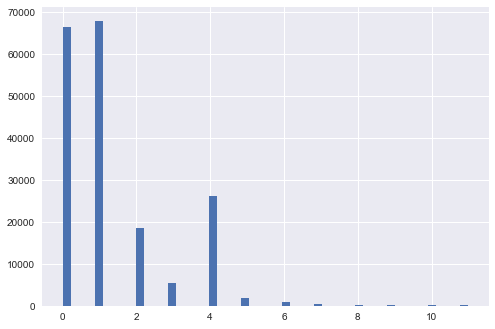

In [70]:
# Most accidents' duration is less than 12 hours.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')
df1 = df[df['total_hour_duration']<12]
df1['total_hour_duration'].hist(bins=50)

<AxesSubplot:xlabel='total_hour_duration'>

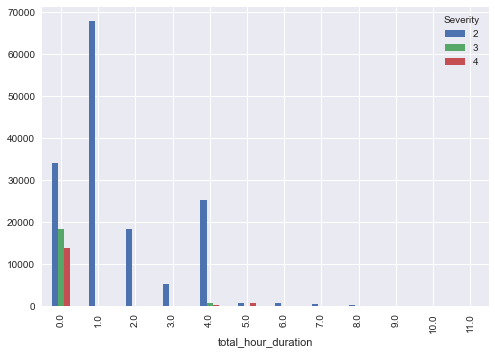

In [71]:
# The most serious accident can also have a duration less than one hour.
# Many severe accidents have a duration of 0 and 6 hours
df1.groupby(['total_hour_duration','Severity']).size().unstack().plot(kind = 'bar')

<AxesSubplot:xlabel='Sunrise_Sunset'>

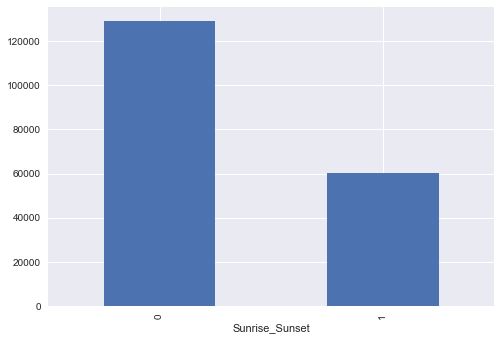

In [72]:
# Analysis of time
Accident_time = df.groupby('Sunrise_Sunset').size()
Accident_time.plot(kind='bar')

<AxesSubplot:xlabel='Start_Hour'>

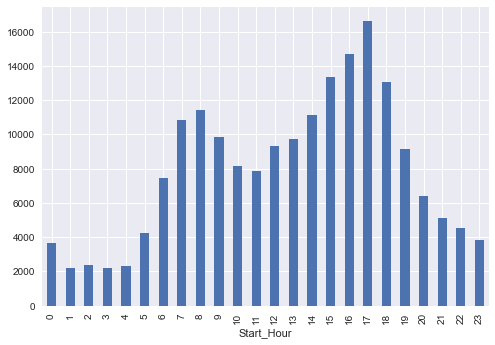

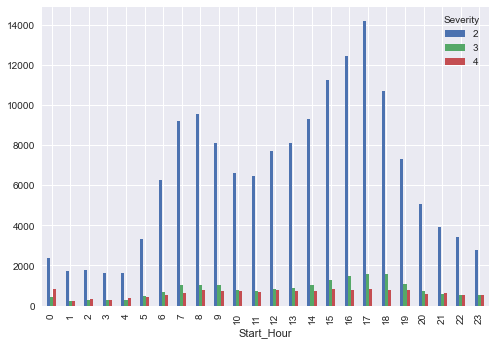

In [73]:
# Analysis of hour: There are more traffic accidents happened in the afternoon, and less accidents in the morning
df['Start_Hour'] = df['Start_Time'].apply(lambda x: x.hour)
Accident_hour = df.groupby('Start_Hour').size()
Accident_hour.plot(kind='bar')
# There is no evident relationship between happened hour and severity:
df.groupby(['Start_Hour','Severity']).size().unstack().plot(kind = 'bar')

(array([153868.,  19886.,   5942.,   2815.,   1823.,   1116.,    828.,
           534.,    452.,    295.]),
 array([0.    , 0.4999, 0.9998, 1.4997, 1.9996, 2.4995, 2.9994, 3.4993,
        3.9992, 4.4991, 4.999 ]),
 <BarContainer object of 10 artists>)

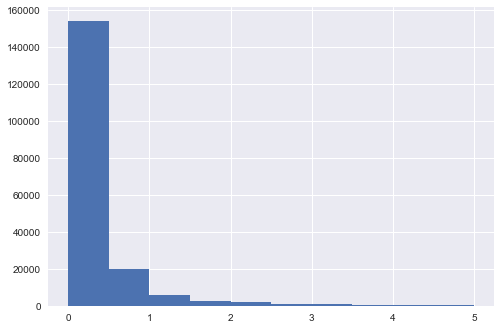

In [74]:
# Analysis of distance: Most accidents affect less than 1 mile.
df2 = df[df['Distance(mi)']<5]
plt.hist(df2['Distance(mi)'])

# Machine Learning

### Objective

*The first objective of this part is to recognize key features affecting the accident severity. Secondly, we aim to develop a model that can accurately predict accident severity. To be specific, for a given accident, this model is supposed to be able to predict the severity as well as the likelihood of this accident being a severe one.* 

In [75]:
features_to_drop = ["Start_Time", "End_Time", "County", "State", "County_State"]
df=df.drop(features_to_drop, axis=1)
df
    

Severity  Start_Lat  Start_Lng  Distance(mi)  Pressure(in)  \
0              3   41.87248  -87.64574         0.150      0.055857   
1              3   41.87561  -87.64155         0.103      0.055857   
2              3   41.90150  -87.92034         0.756      0.007406   
3              3   41.87410  -87.64598         0.113      0.055857   
4              2   44.94843  -92.90329         0.000     -0.137949   
...          ...        ...        ...           ...           ...   
261687         2   34.00248 -117.37936         0.543     -0.103341   
261688         2   32.76696 -117.14806         0.338      0.221977   
261689         2   33.77545 -117.84779         0.561      0.464235   
261690         2   33.99246 -118.40302         0.772      0.381175   
261691         2   34.13393 -117.23092         0.537     -0.304069   

        Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  Amenity  Give_Way  \
0             0.293893         0.201607          -0.151796        0         0   
1             0.293893         0.201607          -0.151796        0         0   
2             0.293893         0.201607          -0.151796        0         0   
3             0.293893         0.201607          -0.151796        0         0   
4             0.293893        -1.280491          -0.151796        0         0   
...                ...              ...                ...      ...       ...   
261687        0.293893         1.127918          -0.151796        0         0   
261688        0.293893        -0.168918          -0.151796        0         0   
261689        0.293893         0.572131          -0.151796        0         0   
261690        0.293893         0.201607          -0.151796        0         0   
261691       -0.716756         0.016345          -0.151796        0         0   

        ...  Station  Stop  Sunrise_Sunset  total_hour_duration  UrbanRural  \
0       ...        0     0               1                  0.0           1   
1       ...        0     0               1                  0.0           1   
2       ...        0     0               1                  0.0           1   
3       ...        0     0               1                  0.0           1   
4       ...        0     0               1                  3.0           1   
...     ...      ...   ...             ...                  ...         ...   
261687  ...        0     0               0                  0.0           1   
261688  ...        0     0               0                  0.0           1   
261689  ...        0     0               0                  0.0           1   
261690  ...        0     0               0                  0.0           1   
261691  ...        0     0               0                  0.0           1   

        Population  Temperature_Wind_Chill_Humidity  Bump_Calming  \
0        5145326.0                        -2.722344             0   
1        5145326.0                        -2.722344             0   
2         922761.0                        -2.946737             0   
3        5145326.0                        -2.722344             0   
4         262541.0                        -3.565362             0   
...            ...                              ...           ...   
261687   2465569.0                         1.815265             0   
261688   3330459.0                         0.226875             0   
261689   3170851.0                         0.578568             0   
261690  10011602.0                         0.133412             0   
261691   2177279.0                         1.262802             0   

        Signal_Crossing  Start_Hour  
0                     0          23  
1                     0          23  
2                     0          23  
3                     0          23  
4                     0          23  
...                 ...         ...  
261687                0          18  
261688                0          19  
261689                0          19  
261690                0          19 

In [76]:
# check missing values
missing_values = df.isna().sum()
percentage = (missing_values/df.shape[0])*100
missing_percentage = pd.DataFrame({"Number_of_missing_values":missing_values,"Percentage":percentage})
missing_percentage.sort_values(by="Percentage",ascending = False)

Number_of_missing_values  Percentage
Severity                                                0         0.0
Railway                                                 0         0.0
Signal_Crossing                                         0         0.0
Bump_Calming                                            0         0.0
Temperature_Wind_Chill_Humidity                         0         0.0
Population                                              0         0.0
UrbanRural                                              0         0.0
total_hour_duration                                     0         0.0
Sunrise_Sunset                                          0         0.0
Stop                                                    0         0.0
Station                                                 0         0.0
No_Exit                                                 0         0.0
Start_Lat                                               0         0.0
Junction                                                0         0.0
Give_Way                                                0         0.0
Amenity                                                 0         0.0
Precipitation(in)                                       0         0.0
Wind_Speed(mph)                                         0         0.0
Visibility(mi)                                          0         0.0
Pressure(in)                                            0         0.0
Distance(mi)                                            0         0.0
Start_Lng                                               0         0.0
Start_Hour                                              0         0.0

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189330 entries, 0 to 261691
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Severity                         189330 non-null  int64  
 1   Start_Lat                        189330 non-null  float64
 2   Start_Lng                        189330 non-null  float64
 3   Distance(mi)                     189330 non-null  float64
 4   Pressure(in)                     189330 non-null  float64
 5   Visibility(mi)                   189330 non-null  float64
 6   Wind_Speed(mph)                  189330 non-null  float64
 7   Precipitation(in)                189330 non-null  float64
 8   Amenity                          189330 non-null  int64  
 9   Give_Way                         189330 non-null  int64  
 10  Junction                         189330 non-null  int64  
 11  No_Exit                          189330 non-null  int64  
 12  Ra

## Build train and test samples

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,1:23]
y_train = train['Severity']
x_test = test.iloc[0:,1:23]
y_test = test['Severity']

## 1.Logistic regression

In [79]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
actuals = np.array(y_test)
logistic_acc = model.score(x_test,actuals)
print(logistic_acc)

0.8174087571964295


In [80]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, model.predict(x_test))
kappa

0.0

In [81]:
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(y_test, model.predict(x_test))
ham_distance

0.18259124280357047

In [82]:
import sklearn.metrics as metrics
metrics.f1_score(y_test, model.predict(x_test),average='macro')

0.2998440330533678

## 2.Decision tree

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth = 20,min_samples_split = 30,min_samples_leaf=30) 
#model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.46630588279934027

## 3.Random forests

In [84]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train,np.ravel(y_train))
model.score(x_test,y_test)

0.8855789714607651

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(x_test))

array([[44722,  1010,   696],
       [ 2593,  2888,   414],
       [ 1360,   426,  2690]])

In [86]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, model.predict(x_test))
kappa

0.6003910034794125

In [87]:
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(y_test, model.predict(x_test))
ham_distance

0.11442102853923485

In [88]:
metrics.f1_score(y_test, model.predict(x_test),average='macro')

0.7185967461514097

### Feature importance

Text(0.5, 0, 'Relative Importance')

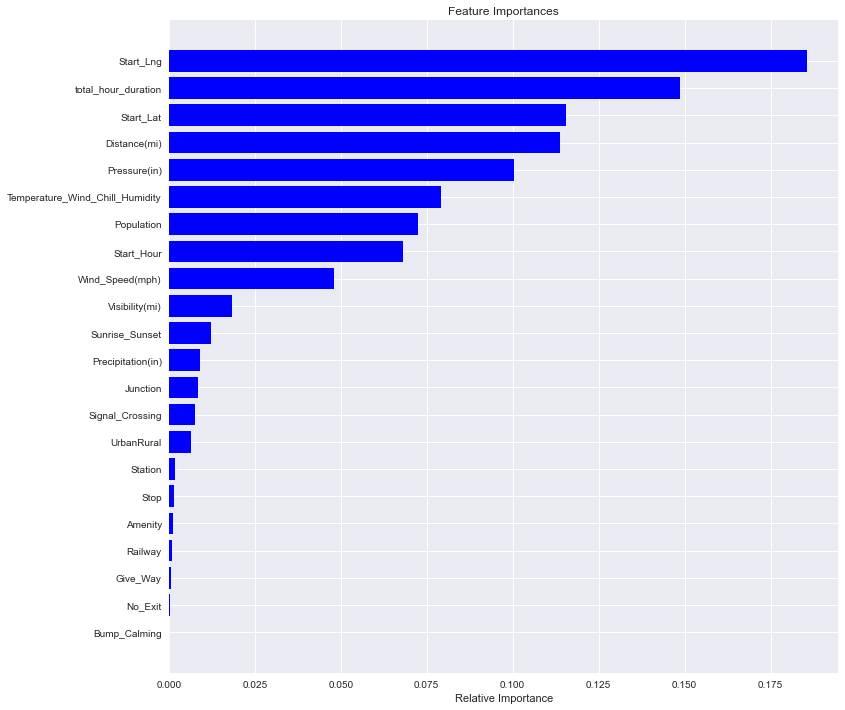

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_names = [key for key in df if not key == 'Severity']
importances = model.feature_importances_ #each attr contribute how much
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')

# plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [90]:
#Using gridsearch to find the best ensemble
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 20 , 30), 
     'max_depth':(1,2,3),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (1,2,3)
}

model = GridSearchCV(RandomForestClassifier(),parameters,cv=3)
model.fit(x_train, y_train)
model.best_score_, model.best_params_

(0.8299114924055503,
 {'max_depth': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 10})

In [91]:
# Ensamble using Bootstrapping
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8847514921037343

In [92]:
metrics.f1_score(y_test, model.predict(x_test),average='macro')

0.7185548974951675

In [93]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, model.predict(x_test))
kappa

0.6036891502373214

In [94]:
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(y_test, model.predict(x_test))
ham_distance

0.11524850789626578

In [95]:
parameters = {
     'n_estimators':(30, 50), 
     'max_samples':(30,40,50),
     'max_features':(5,10,20),

     
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=3)
model.fit(x_train,y_train)
model.best_score_, model.best_params_

(0.8302736718201779,
 {'max_features': 20, 'max_samples': 50, 'n_estimators': 50})

## 4.Neural network

In [96]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(10,10), max_iter = 1000, 
                    activation='relu',
                    learning_rate='invscaling')
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
actuals = y_test
tp=tn=fp=fn=0
print(clf.loss_)
print(clf.n_iter_)

0.5982908244533126
37


In [97]:
actuals = np.array(actuals)

In [98]:
correct = 0
for i in range(len(actuals)):
    if actuals[i] == predictions[i]:
        correct += 1
    else:
        continue
nn_accuracy = (correct/len(actuals))
print(nn_accuracy)

0.8176552404091622


In [99]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, clf.predict(x_test))
kappa

0.003053936326191664

In [100]:
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(y_test,clf.predict(x_test))
ham_distance

0.18234475959083787

In [101]:
metrics.f1_score(y_test, model.predict(x_test),average='macro')

0.3104769685924496

In [102]:
#try different parameters setting combination
#'learning_rate':["constant", "invscaling", "adaptive"],
#'solver': ('sgd','lbfgs','adam'),
#'activation': ('logistic','tanh','relu'),
  
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(30,60,80), max_iter = 1000, 
                    activation='tanh',
                    learning_rate='constant')
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
actuals = y_test
tp=tn=fp=fn=0
print(clf.loss_)
print(clf.n_iter_)

0.5990933363385994
13


In [103]:
actuals = np.array(actuals)
correct = 0
for i in range(len(actuals)):
    if actuals[i] == predictions[i]:
        correct += 1
    else:
        continue
nn_accuracy = (correct/len(actuals))
print(nn_accuracy)

0.8174087571964295


# Transfer to a binary classificatin problem

As seen from above, the data is so unbalanced that we can hardly do exploratory analysis, even decision tree looks good in terms of several performance indicators. To address this issue, the smote algorithm will be used to resample the data on the basis of transfering 4 categories into 2.

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information. In this project, we will use Oversampling Technique: SMOTE.

In [104]:
bi = df.copy()
bi['Severity2'] = np.where(bi['Severity']==2,1,0)
bi = bi.drop('Severity', axis=1)
bi

Start_Lat  Start_Lng  Distance(mi)  Pressure(in)  Visibility(mi)  \
0        41.87248  -87.64574         0.150      0.055857        0.293893   
1        41.87561  -87.64155         0.103      0.055857        0.293893   
2        41.90150  -87.92034         0.756      0.007406        0.293893   
3        41.87410  -87.64598         0.113      0.055857        0.293893   
4        44.94843  -92.90329         0.000     -0.137949        0.293893   
...           ...        ...           ...           ...             ...   
261687   34.00248 -117.37936         0.543     -0.103341        0.293893   
261688   32.76696 -117.14806         0.338      0.221977        0.293893   
261689   33.77545 -117.84779         0.561      0.464235        0.293893   
261690   33.99246 -118.40302         0.772      0.381175        0.293893   
261691   34.13393 -117.23092         0.537     -0.304069       -0.716756   

        Wind_Speed(mph)  Precipitation(in)  Amenity  Give_Way  Junction  ...  \
0              0.201607          -0.151796        0         0         0  ...   
1              0.201607          -0.151796        0         0         1  ...   
2              0.201607          -0.151796        0         0         1  ...   
3              0.201607          -0.151796        0         0         0  ...   
4             -1.280491          -0.151796        0         0         0  ...   
...                 ...                ...      ...       ...       ...  ...   
261687         1.127918          -0.151796        0         0         0  ...   
261688        -0.168918          -0.151796        0         0         0  ...   
261689         0.572131          -0.151796        0         0         1  ...   
261690         0.201607          -0.151796        0         0         0  ...   
261691         0.016345          -0.151796        0         0         0  ...   

        Stop  Sunrise_Sunset  total_hour_duration  UrbanRural  Population  \
0          0               1                  0.0           1   5145326.0   
1          0               1                  0.0           1   5145326.0   
2          0               1                  0.0           1    922761.0   
3          0               1                  0.0           1   5145326.0   
4          0               1                  3.0           1    262541.0   
...      ...             ...                  ...         ...         ...   
261687     0               0                  0.0           1   2465569.0   
261688     0               0                  0.0           1   3330459.0   
261689     0               0                  0.0           1   3170851.0   
261690     0               0                  0.0           1  10011602.0   
261691     0               0                  0.0           1   2177279.0   

        Temperature_Wind_Chill_Humidity  Bump_Calming  Signal_Crossing  \
0                             -2.722344             0                0   
1                             -2.722344             0                0   
2                             -2.946737             0                0   
3                             -2.722344             0                0   
4                             -3.565362             0                0   
...                                 ...           ...              ...   
261687                         1.815265             0                0   
261688                         0.226875             0                0   
261689                         0.578568             0                0   
261690                         0.133412             0                0   
261691                         1.262802             0                0   

        Start_Hour  Severity2  
0               23          0  
1               23          0  
2               23          0  
3               23          0  
4               23          1  
...            ...        ...  
261687          18          1  
261688          19          1  
261689          19          1  


In [105]:
bi.Severity2.value_counts()

1    154862
0     34468
Name: Severity2, dtype: int64

In [106]:
#split data set again according to the 'new severity2'
from sklearn.model_selection import train_test_split
train, test = train_test_split(bi, test_size = 0.3)
x_train = train.iloc[0:,0:13]
y_train = train['Severity2']
x_test = test.iloc[0:,0:13]
y_test = test['Severity2']

In [107]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [108]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)
print('Before',counter)

smt = SMOTE()
x_train_sm,y_train_sm=smt.fit_resample(x_train,y_train)
counter = Counter(y_train_sm)
print('After',counter)


Before Counter({1: 108459, 0: 24072})
After Counter({1: 108459, 0: 108459})


## Model-1: Logistic Regression

### 1. Original Unsampled Data

In [109]:
from sklearn import linear_model
clf_LR = linear_model.LogisticRegression()
clf_LR.fit(x_train,y_train)

/opt/anaconda3/envs/env2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [110]:
# build evaluation function
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):

    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)
    (fpr, tpr, thresholds) = roc_curve(y_test,y_pred)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    
    area = auc(fpr,tpr)
    plt.clf() #Clear the current figure
    plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

    plt.plot([0, 1], [0, 1], 'k')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Out sample ROC')
    plt.legend(loc="lower right")
    plt.show()
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1])) 
    
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

Confusion Matrix
[[ 2864  7532]
 [ 2468 43935]] 

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.28      0.36     10396
           1       0.85      0.95      0.90     46403

    accuracy                           0.82     56799
   macro avg       0.70      0.61      0.63     56799
weighted avg       0.80      0.82      0.80     56799
 



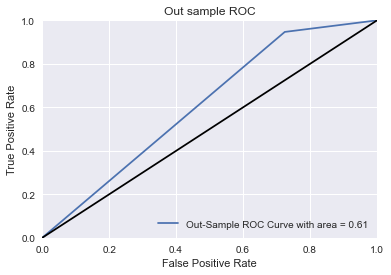

AUC-ROC
0.8202314470287604


In [111]:
test_eval(clf_LR, x_test, y_test, 'Logistic Regression', 'actual')

### 2. SMOTE Resampling

In [112]:
clf_LR2 = linear_model.LogisticRegression()
clf_LR2.fit(x_train_sm, y_train_sm)

/opt/anaconda3/envs/env2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Confusion Matrix
[[ 8394  2002]
 [10672 35731]] 

Classification Report
              precision    recall  f1-score   support

           0       0.44      0.81      0.57     10396
           1       0.95      0.77      0.85     46403

    accuracy                           0.78     56799
   macro avg       0.69      0.79      0.71     56799
weighted avg       0.85      0.78      0.80     56799
 



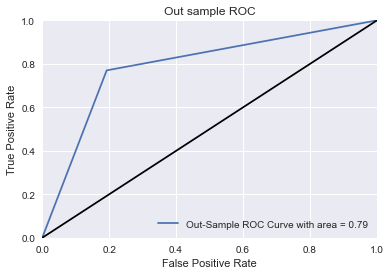

AUC-ROC
0.8284947571958889


In [113]:
test_eval(clf_LR2, x_test, y_test, 'Logistic Regression', 'smote')

## Model-2: Decision Tree

In [114]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]


### 1. Original Unsampled Data

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
tree_model = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(x_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9, min_samples_split=50)

Confusion Matrix
[[ 6808  3588]
 [ 3804 42599]] 

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.65      0.65     10396
           1       0.92      0.92      0.92     46403

    accuracy                           0.87     56799
   macro avg       0.78      0.79      0.78     56799
weighted avg       0.87      0.87      0.87     56799
 



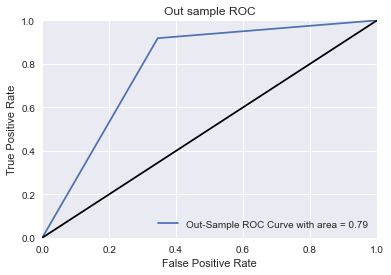

AUC-ROC
0.9212984189146664


In [116]:
test_eval(clf_DT, x_test, y_test, 'Decision Tree', 'actual')

### 2. SMOTE Resampling

In [117]:
clf_DT2 = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT2.fit(x_train_sm, y_train_sm)
clf_DT2.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=100)

Confusion Matrix
[[ 9162  1234]
 [ 8094 38309]] 

Classification Report
              precision    recall  f1-score   support

           0       0.53      0.88      0.66     10396
           1       0.97      0.83      0.89     46403

    accuracy                           0.84     56799
   macro avg       0.75      0.85      0.78     56799
weighted avg       0.89      0.84      0.85     56799
 



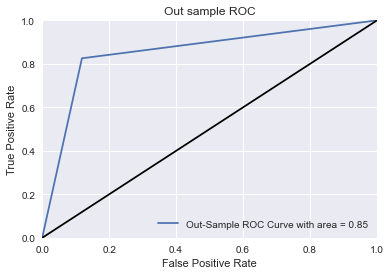

AUC-ROC
0.9210753825264562


In [118]:
test_eval(clf_DT2, x_test, y_test, 'Decision Tree', 'smote')

## Model-3: Random Forest

### 1. Original Unsampled Data

In [119]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=10)
clf_RF.fit(x_train,np.ravel(y_train))

RandomForestClassifier(n_estimators=10)

Confusion Matrix
[[ 7291  3105]
 [ 3529 42874]] 

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.70      0.69     10396
           1       0.93      0.92      0.93     46403

    accuracy                           0.88     56799
   macro avg       0.80      0.81      0.81     56799
weighted avg       0.89      0.88      0.88     56799
 



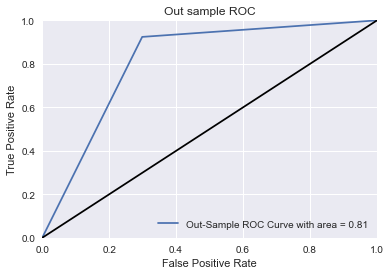

AUC-ROC
0.9234680610706358


In [120]:
test_eval(clf_RF, x_test, y_test, 'Random Forest', 'actual')

### 2. SMOTE Resampling

In [121]:
clf_RF2 = RandomForestClassifier(n_estimators=10)
clf_RF2.fit(x_train_sm, np.ravel(y_train_sm))

RandomForestClassifier(n_estimators=10)

Confusion Matrix
[[ 8526  1870]
 [ 5862 40541]] 

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.82      0.69     10396
           1       0.96      0.87      0.91     46403

    accuracy                           0.86     56799
   macro avg       0.77      0.85      0.80     56799
weighted avg       0.89      0.86      0.87     56799
 



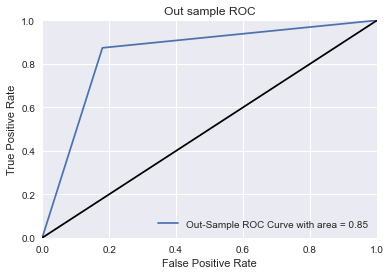

AUC-ROC
0.9252778379922084


In [122]:
test_eval(clf_RF2, x_test, y_test, 'Random Forest', 'smote')

# Model-4: Bootstrapping

### 1. Original Unsampled Data

In [123]:
# Ensamble using Bootstrapping
from sklearn.ensemble import BaggingClassifier
clf_BS=BaggingClassifier()
clf_BS.fit(x_train,y_train)

BaggingClassifier()

Confusion Matrix
[[ 7387  3009]
 [ 3629 42774]] 

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.71      0.69     10396
           1       0.93      0.92      0.93     46403

    accuracy                           0.88     56799
   macro avg       0.80      0.82      0.81     56799
weighted avg       0.89      0.88      0.88     56799
 



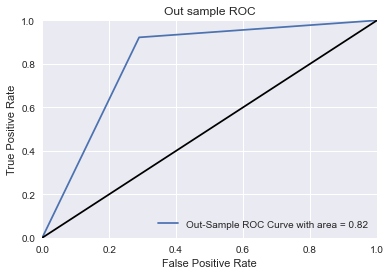

AUC-ROC
0.9214169426246365


In [124]:
test_eval(clf_BS, x_test, y_test, 'Bootstrapping', 'actual')

### 2. SMOTE Resampling

In [125]:
# Ensamble using Bootstrapping
from sklearn.ensemble import BaggingClassifier
clf_BS2=BaggingClassifier()
clf_BS2.fit(x_train_sm, y_train_sm)

BaggingClassifier()

Confusion Matrix
[[ 8587  1809]
 [ 5648 40755]] 

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.83      0.70     10396
           1       0.96      0.88      0.92     46403

    accuracy                           0.87     56799
   macro avg       0.78      0.85      0.81     56799
weighted avg       0.89      0.87      0.88     56799
 



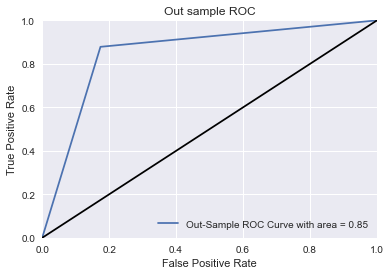

AUC-ROC
0.9258231446937552


In [126]:
test_eval(clf_BS2, x_test, y_test, 'Bootstrapping', 'smote')

# Model-5: Neural Network

### 1. Original Unsampled Data

In [127]:
#try different parameters setting combination
#'learning_rate':["constant", "invscaling", "adaptive"],
#'solver': ('sgd','lbfgs','adam'),
#'activation': ('logistic','tanh','relu'),
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(solver='adam', hidden_layer_sizes=(10,10), max_iter = 1000, 
                    activation='relu',
                    learning_rate='constant')
clf_NN.fit(x_train,y_train)



MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

Confusion Matrix
[[ 5039  5357]
 [ 2878 43525]] 

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.48      0.55     10396
           1       0.89      0.94      0.91     46403

    accuracy                           0.86     56799
   macro avg       0.76      0.71      0.73     56799
weighted avg       0.84      0.86      0.85     56799
 



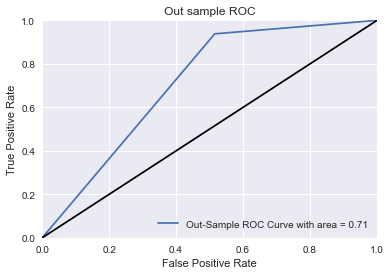

AUC-ROC
0.9066454356660562


In [128]:
test_eval(clf_NN, x_test, y_test, 'Neural Network', 'actual')

### 2. SMOTE Resampling

In [129]:
#try different parameters setting combination
#'learning_rate':["constant", "invscaling", "adaptive"],
#'solver': ('sgd','lbfgs','adam'),
#'activation': ('logistic','tanh','relu'),
from sklearn.neural_network import MLPClassifier
clf_NN2 = MLPClassifier(solver='adam', hidden_layer_sizes=(10,10), max_iter = 1000, 
                    activation='relu',
                    learning_rate='constant')
clf_NN2.fit(x_train_sm,y_train_sm)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

Confusion Matrix
[[ 9153  1243]
 [ 9675 36728]] 

Classification Report
              precision    recall  f1-score   support

           0       0.49      0.88      0.63     10396
           1       0.97      0.79      0.87     46403

    accuracy                           0.81     56799
   macro avg       0.73      0.84      0.75     56799
weighted avg       0.88      0.81      0.83     56799
 



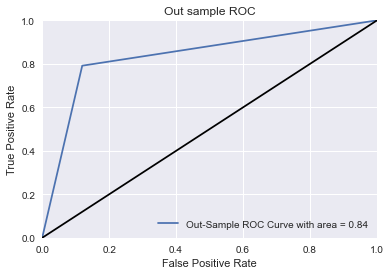

AUC-ROC
0.8960511802777873


In [130]:
test_eval(clf_NN2, x_test, y_test, 'Neural Network', 'smote')

# Model Comparision

In [136]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})
clf_eval_df

model resample  precision    recall  f1-score   AUC-ROC
0  Logistic Regression   actual   0.853654  0.946814  0.897824  0.820231
1  Logistic Regression    smote   0.946943  0.770015  0.849363  0.828495
2        Decision Tree   actual   0.922316  0.918023  0.920164  0.921298
3        Decision Tree    smote   0.968793  0.825572  0.891467  0.921075
4        Random Forest   actual   0.932469  0.923949  0.928189  0.923468
5        Random Forest    smote   0.955908  0.873672  0.912942  0.925278
6        Bootstrapping   actual   0.934277  0.921794  0.927993  0.921417
7        Bootstrapping    smote   0.957499  0.878284  0.916182  0.925823
8       Neural Network   actual   0.890410  0.937978  0.913575  0.906645
9       Neural Network    smote   0.967264  0.791501  0.870600  0.896051

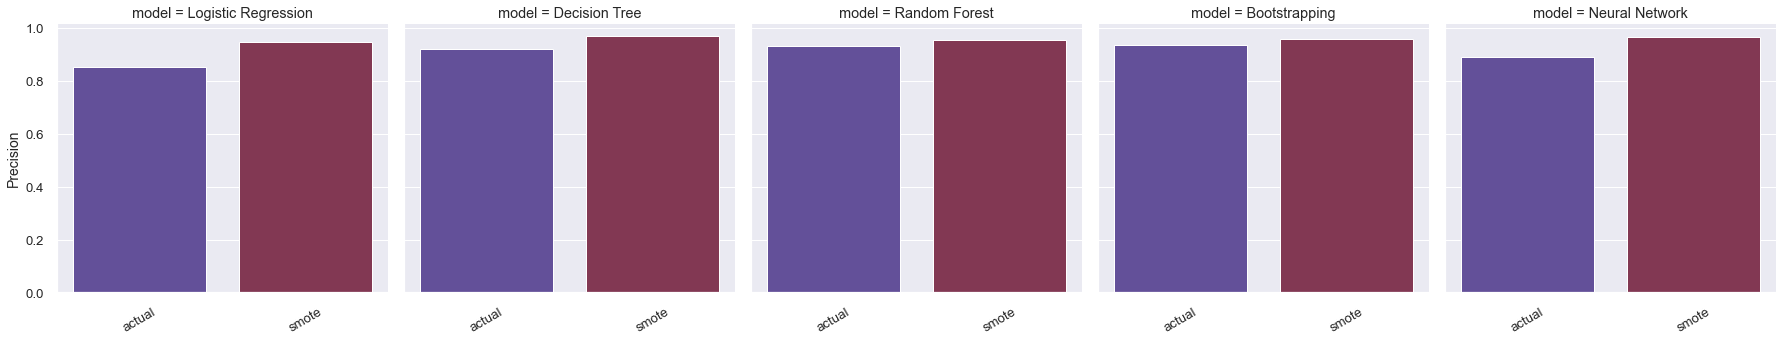

In [132]:
sns.set(font_scale=1.2)

g = sns.FacetGrid(clf_eval_df, col="model", height=5)

# precision
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Precision', fontsize=14)


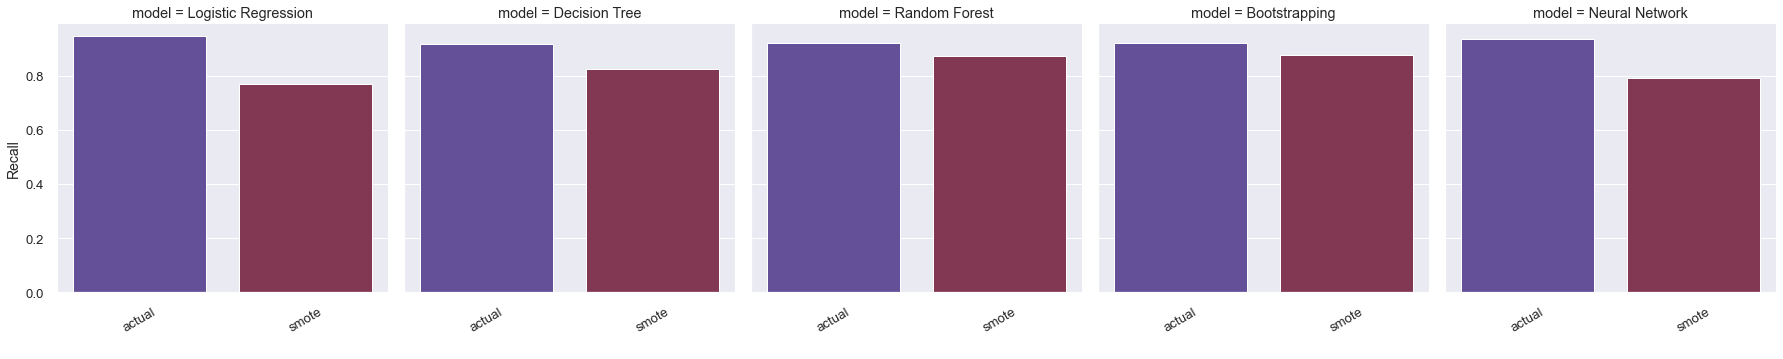

In [133]:
sns.set(font_scale=1.2)

g = sns.FacetGrid(clf_eval_df, col="model", height=5)
# recall
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Recall', fontsize=14)


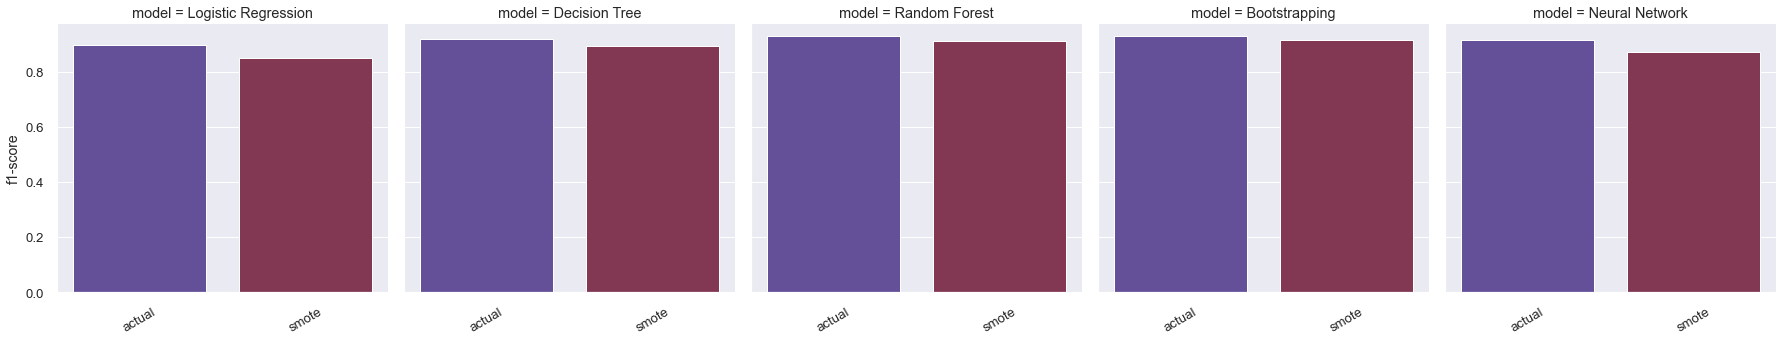

In [134]:
sns.set(font_scale=1.2)

g = sns.FacetGrid(clf_eval_df, col="model", height=5)
# f1-score
g.map(sns.barplot, "resample", "f1-score", palette='twilight', order=["actual", "smote"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('f1-score', fontsize=14)


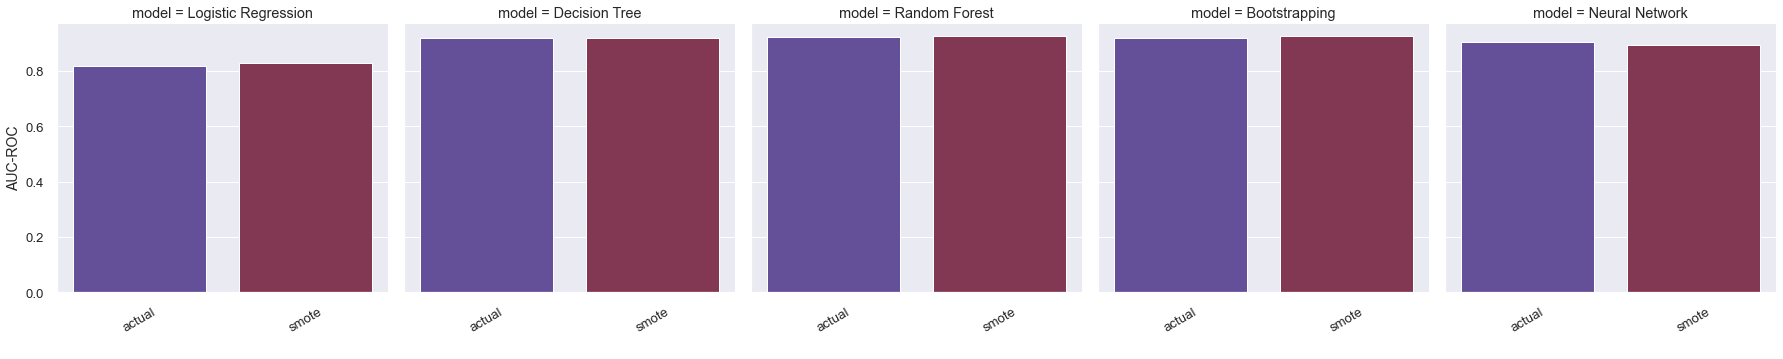

In [135]:
sns.set(font_scale=1.2)

g = sns.FacetGrid(clf_eval_df, col="model", height=5)
#AUC-ROC
g.map(sns.barplot, "resample", "AUC-ROC", palette='twilight', order=["actual", "smote"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('AUC-ROC', fontsize=14)